In [26]:
#Objective: To detect eyes closed or open in a dataset of more than 100 people
#dataset is fetched from kaggle
#libraries used- keras, matplotlib, os, scipy
#used to tell the accuracy 

In [25]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [15]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [16]:
import os
def plot_imgs(data_path, top=10):
    all_item_dirs = os.listdir(data_path)
    item_files = [os.path.join(data_path, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

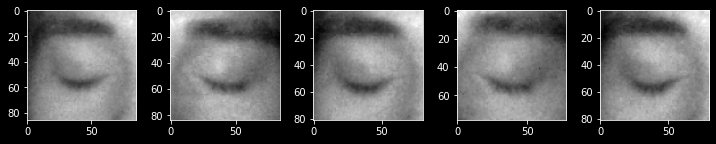

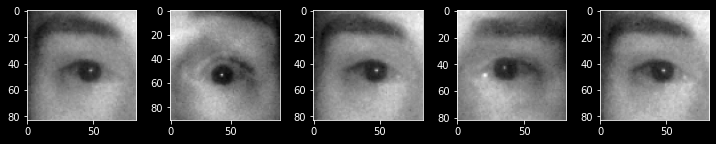

In [17]:
data_path = 'C:/Users/meenal.jain/eyedetection/dataset/train'

directories = ['/Closed_Eyes', '/Open_Eyes']

for j in directories:
    plot_imgs(data_path+j)

In [18]:
batch_size = 32
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
train_data_path = 'C:/Users/meenal.jain/eyedetection/dataset/train'
test_data_path = 'C:/Users/meenal.jain/eyedetection/dataset/test'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (64,64),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (64,64),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical') 

Found 3400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [20]:
#Model: "sequential_2"
classes = 2

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))

model.add(Dense(classes, activation = 'softmax'))

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)       

In [21]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [22]:
model_path="yawn_detection.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [23]:
num_epochs = 20
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [24]:
history = model.fit(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/20
106/106 [==============================] - ETA: 0s - loss: 0.2933 - accuracy: 0.8581
Epoch 1: val_accuracy improved from -inf to 0.97743, saving model to yawn_detection.h5
106/106 [==============================] - 30s 262ms/step - loss: 0.2933 - accuracy: 0.8581 - val_loss: 0.0642 - val_accuracy: 0.9774
Epoch 2/20
106/106 [==============================] - ETA: 0s - loss: 0.0668 - accuracy: 0.9798
Epoch 2: val_accuracy improved from 0.97743 to 0.99826, saving model to yawn_detection.h5
106/106 [==============================] - 27s 258ms/step - loss: 0.0668 - accuracy: 0.9798 - val_loss: 0.0089 - val_accuracy: 0.9983
Epoch 3/20
106/106 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9869
Epoch 3: val_accuracy improved from 0.99826 to 1.00000, saving model to yawn_detection.h5
106/106 [==============================] - 27s 259ms/step - loss: 0.0429 - accuracy: 0.9869 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/20
106/106 [=======================